In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# carregar o arquivo
file_path = "used_cars.csv"
df = pd.read_csv(file_path)

In [3]:
# imprimir as 5 primeiras linhas
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [4]:
# informacoes gerais sobre o df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [5]:
# Remover o " mi." do final de cada linha da coluna 'milage'
df['milage'] = df['milage'].str[:-4]


In [6]:
# Substituir a vírgula por nada
df['milage'] = df['milage'].str.replace(',', '')

In [7]:
# Converter a coluna limpa para o tipo numérico (inteiro)
df['milage'] = df['milage'].astype(int)

In [8]:
# mesmo para coluna price
df['price'] = df['price'].str[1:].str.replace(',', '').astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   int64 
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 376.0+ KB


In [10]:
df['fuel_type']

0       E85 Flex Fuel
1            Gasoline
2            Gasoline
3              Hybrid
4            Gasoline
            ...      
4004         Gasoline
4005         Gasoline
4006              NaN
4007         Gasoline
4008         Gasoline
Name: fuel_type, Length: 4009, dtype: object

In [11]:
# combustivel mais comum
predom_fuel = df['fuel_type'].mode()[0]

In [12]:
# preencher os campos vazios conforme a variavel predominante
df['fuel_type'].fillna(predom_fuel, inplace=True)

In [13]:
# check 4009 para fuel_type
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   int64 
 4   fuel_type     4009 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 376.0+ KB


In [14]:
# informacoes contidas na coluna
df['accident'].value_counts()

accident
None reported                             2910
At least 1 accident or damage reported     986
Name: count, dtype: int64

In [15]:
predom_acc = df['accident'].mode()[0]

In [16]:
df['accident'] = df['accident'].fillna(predom_acc)


In [17]:
predom_clean = df['clean_title'].mode()[0]

In [18]:
df['clean_title'] = df['clean_title'].fillna(predom_clean)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   int64 
 4   fuel_type     4009 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      4009 non-null   object
 10  clean_title   4009 non-null   object
 11  price         4009 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 376.0+ KB


In [20]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3479
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [21]:
val_indesejados = ["–", "not supported"]

In [22]:
df['fuel_type'] = df['fuel_type'].replace(val_indesejados, predom_fuel)

In [23]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3526
Hybrid             194
E85 Flex Fuel      139
Diesel             116
Plug-In Hybrid      34
Name: count, dtype: int64

In [24]:
# one-hot-encoding "O One-Hot Encoding transforma essa única coluna 
# em várias novas colunas, uma para cada categoria. Cada nova coluna terá apenas os valores 0 ou 1."
fuel_dummies = pd.get_dummies(df['fuel_type'], prefix='fuel')

In [25]:
fuel_dummies.head()

,fuel_Diesel,fuel_E85 Flex Fuel,fuel_Gasoline,fuel_Hybrid,fuel_Plug-In Hybrid
0,False,True,False,False,False
1,False,False,True,False,False
2,False,False,True,False,False
3,False,False,False,True,False
4,False,False,True,False,False


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   int64 
 4   fuel_type     4009 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      4009 non-null   object
 10  clean_title   4009 non-null   object
 11  price         4009 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 376.0+ KB


In [27]:
# concatenar as duas tabelas
df = pd.concat([df, fuel_dummies], axis=1)

In [28]:
# remover a coluna fuel_type
df = df.drop('fuel_type', axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   brand                4009 non-null   object
 1   model                4009 non-null   object
 2   model_year           4009 non-null   int64 
 3   milage               4009 non-null   int64 
 4   engine               4009 non-null   object
 5   transmission         4009 non-null   object
 6   ext_col              4009 non-null   object
 7   int_col              4009 non-null   object
 8   accident             4009 non-null   object
 9   clean_title          4009 non-null   object
 10  price                4009 non-null   int64 
 11  fuel_Diesel          4009 non-null   bool  
 12  fuel_E85 Flex Fuel   4009 non-null   bool  
 13  fuel_Gasoline        4009 non-null   bool  
 14  fuel_Hybrid          4009 non-null   bool  
 15  fuel_Plug-In Hybrid  4009 non-null   bool  
dtypes: boo

In [30]:
df['clean_title'].value_counts()

clean_title
Yes    4009
Name: count, dtype: int64

In [31]:
cols_codificar = ['transmission', 'accident', 'clean_title', 'brand']

In [32]:
df = pd.get_dummies(df, columns=cols_codificar, drop_first=True)

In [33]:
# df simplificado
df_modelo = df.drop(columns=['model', 'engine', 'ext_col', 'int_col'])

In [34]:
# features X e alvo y
X = df_modelo.drop('price', axis=1)
y = df_modelo['price']

In [35]:
# colunas que usaremos para prever
X

,model_year,milage,fuel_Diesel,fuel_E85 Flex Fuel,fuel_Gasoline,fuel_Hybrid,fuel_Plug-In Hybrid,transmission_1-Speed Automatic,transmission_10-Speed A/T,transmission_10-Speed Automatic,...,brand_Saab,brand_Saturn,brand_Scion,brand_Subaru,brand_Suzuki,brand_Tesla,brand_Toyota,brand_Volkswagen,brand_Volvo,brand_smart
0,2013,51000,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2021,34742,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2022,22372,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2015,88900,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2021,9835,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,2023,714,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4005,2022,10900,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4006,2022,2116,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4007,2020,33000,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
# coluna que queremos prever
y

0        10300
1        38005
2        54598
3        15500
4        34999
         ...  
4004    349950
4005     53900
4006     90998
4007     62999
4008     40000
Name: price, Length: 4009, dtype: int64

In [37]:
# 0.80 treino e 0.20 teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train

,model_year,milage,fuel_Diesel,fuel_E85 Flex Fuel,fuel_Gasoline,fuel_Hybrid,fuel_Plug-In Hybrid,transmission_1-Speed Automatic,transmission_10-Speed A/T,transmission_10-Speed Automatic,...,brand_Saab,brand_Saturn,brand_Scion,brand_Subaru,brand_Suzuki,brand_Tesla,brand_Toyota,brand_Volkswagen,brand_Volvo,brand_smart
2473,2018,73049,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1338,2023,9980,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1613,2016,55250,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1610,2017,77300,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2600,2018,33700,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,2006,110000,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1294,1995,120000,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
860,2016,131193,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3507,2018,48619,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
X_test

,model_year,milage,fuel_Diesel,fuel_E85 Flex Fuel,fuel_Gasoline,fuel_Hybrid,fuel_Plug-In Hybrid,transmission_1-Speed Automatic,transmission_10-Speed A/T,transmission_10-Speed Automatic,...,brand_Saab,brand_Saturn,brand_Scion,brand_Subaru,brand_Suzuki,brand_Tesla,brand_Toyota,brand_Volkswagen,brand_Volvo,brand_smart
2580,2018,50992,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3660,2004,64500,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
897,2017,86000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2091,2013,24933,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1044,2018,18500,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2022,8794,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
712,2023,2200,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
274,2019,6700,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2279,2019,52300,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
# criar e treinar o modelo de regressao
modelo = LinearRegression()
modelo.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
previsoes = modelo.predict(X_test)
mse = mean_squared_error(y_test, previsoes)
rmse = np.sqrt(mse)

In [50]:
mse

19026956190.625454

In [51]:
print(f"O erro médio do nosso modelo (RMSE) é: ${mse:,.2f}")

O erro médio do nosso modelo (RMSE) é: $19,026,956,190.63


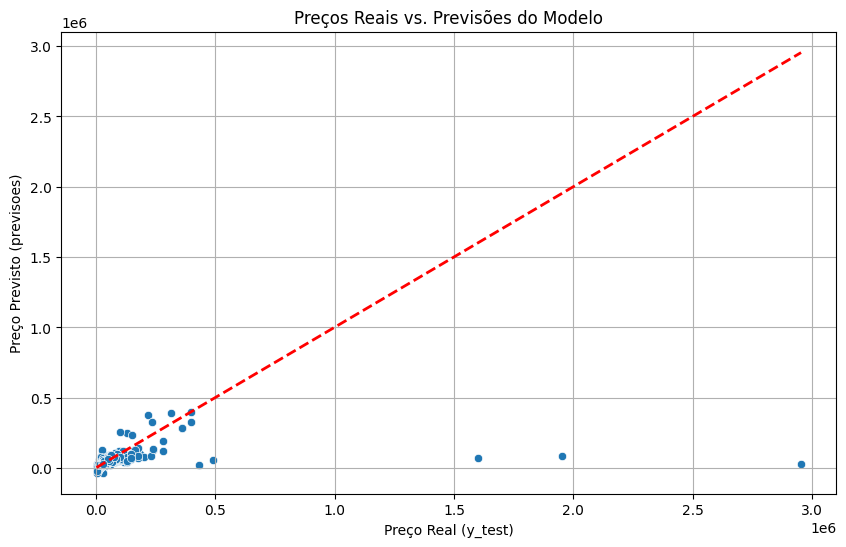

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=previsoes)

# Criar a linha de "previsão perfeita" (y=x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)

# Adicionar títulos e rótulos
plt.title('Preços Reais vs. Previsões do Modelo')
plt.xlabel('Preço Real (y_test)')
plt.ylabel('Preço Previsto (previsoes)')
plt.grid(True)
plt.show()

In [52]:
# vamos remover os outliers > 10^6
limite_preco = 1500000


In [57]:
# filtrar pelo limite estabelecido
df_no_outlier = df_modelo[df_modelo['price'] < limite_preco]

In [62]:
# comparar os dfs
print("numero de carros: antes depois:",len(df_modelo), len(df_no_outlier))

numero de carros: antes depois: 4009 4006


In [63]:
# repetir o processo de modelagem
X_novo = df_no_outlier.drop('price', axis=1)
y_novo = df_no_outlier['price']

In [64]:
X_train_novo, X_test_novo, y_train_novo, y_test_novo = train_test_split(X_novo, y_novo, test_size=0.2, random_state=42)

In [65]:
modelo_novo = LinearRegression()
modelo_novo.fit(X_train_novo, y_train_novo)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
previsoes_novo = modelo_novo.predict(X_test_novo)

In [72]:
rmse_novo = np.sqrt(mean_squared_error(previsoes_novo, y_test_novo))

In [73]:
print(f"\nO RMSE do modelo original era: ${rmse:,.2f}")
print(f"O NOVO erro médio (RMSE) sem outliers é: ${rmse_novo:,.2f}")


O RMSE do modelo original era: $137,938.23
O NOVO erro médio (RMSE) sem outliers é: $28,772.17


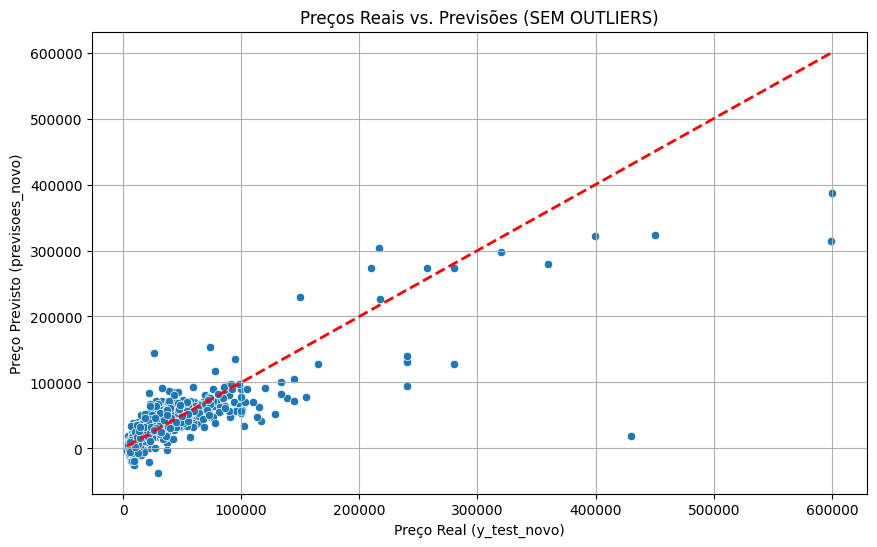

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_novo, y=previsoes_novo)
plt.plot([min(y_test_novo), max(y_test_novo)], [min(y_test_novo), max(y_test_novo)], color='red', linestyle='--', lw=2)
plt.title('Preços Reais vs. Previsões (SEM OUTLIERS)')
plt.xlabel('Preço Real (y_test_novo)')
plt.ylabel('Preço Previsto (previsoes_novo)')
plt.grid(True)
plt.show()